<a href="https://colab.research.google.com/github/cdg-idera/PythonNotebooks/blob/main/%C2%BFComo_consultar_los_metadatos_de_una_im%C3%A1gen_satelital%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Crear un directorio llamado "mi_directorio"

!ls


imagenes  sample_data


**Montar** el directorio del Drive de la cuenta de cdg.idera@ en el directorio drive

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cambio de directorio al directorio imágenes donde tengo una imágen satelital.

In [39]:
# Cambiar al directorio de Google Drive
import os
os.chdir('/content/drive/MyDrive/imagenes')

In [40]:
!ls

LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif


Instalar rasterio si no está instalado en colab

In [42]:
#! pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 64.5 MB/s eta 0:00:00


In [43]:
import rasterio

In [44]:
imagen_satelital = rasterio.open(r"LC09_L2SP_008057_20230203_20230311_02_T1_MTL.tif")

Cantidad de bandas: propiedad count

In [46]:
imagen_satelital.count

7

In [48]:
imagen_satelital.width


4926

In [49]:
imagen_satelital.height

3484

In [50]:
imagen_satelital.bounds

BoundingBox(left=494356.5212026284, bottom=455232.36541813484, right=642109.8165256245, top=559730.7462181349)

In [51]:
imagen_satelital.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]')

In [52]:
imagen_satelital.indexes

(1, 2, 3, 4, 5, 6, 7)

In [54]:
from rasterio.plot import show

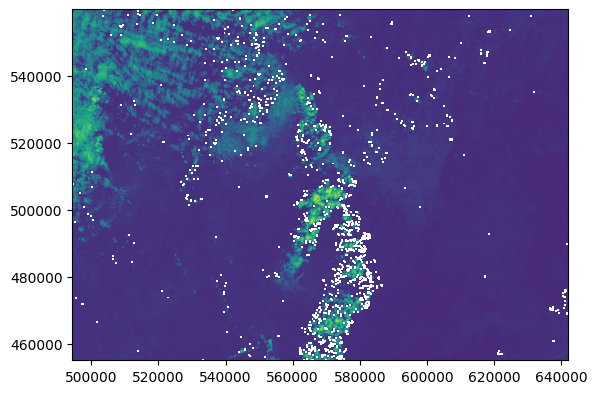

<Axes: >

In [55]:
show(imagen_satelital)

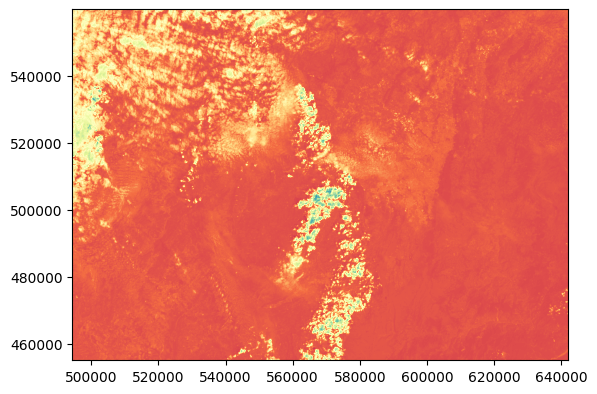

<Axes: >

In [56]:
show((imagen_satelital, 4), cmap = "Spectral")

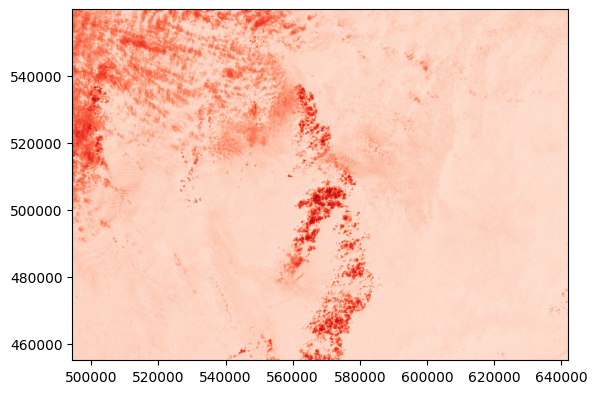

<Axes: >

In [57]:
show((imagen_satelital, 3), cmap = "Reds")

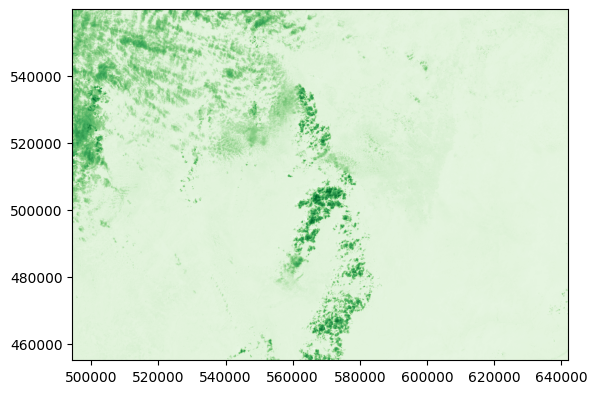

<Axes: >

In [58]:
show((imagen_satelital, 2), cmap = "Greens")

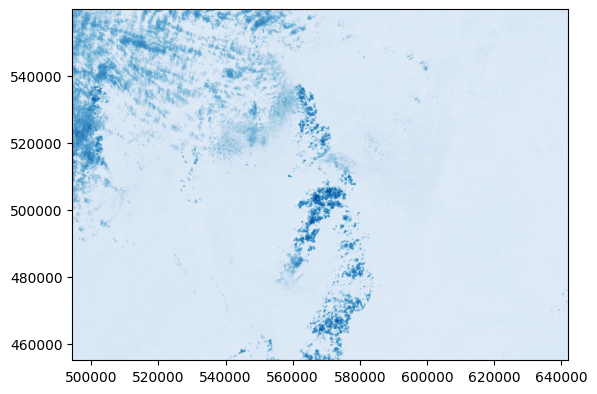

<Axes: >

In [59]:
show((imagen_satelital, 1), cmap = "Blues")

In [60]:
banda_azul = imagen_satelital.read(1)
banda_azul

array([[27498, 27762, 27454, ...,  7943,  8612,  9047],
       [27575, 28229, 27793, ...,  8471,  9689, 10224],
       [29099, 29306, 28551, ...,  8595,  9641, 10528],
       ...,
       [ 8539,  8642,  8818, ...,  8094,  8128,  8111],
       [ 8150,  8426,  8764, ...,  8059,  8114,  8068],
       [ 8006,  8348,  8162, ...,  8094,  8054,  8104]], dtype=uint16)

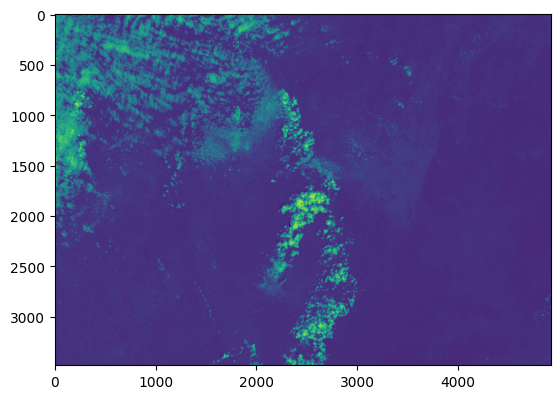

<Axes: >

In [61]:
show(banda_azul)